## BOSTON HOUSE PRICE PREDICTION

In [2]:
# import 
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import boston_valuation as val

%matplotlib inline

### Gather Data
[Source: Original research paper](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y)

In [3]:
boston_dataset = load_boston()

C:\Users\Kiran Bharadwaj HD\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

In [4]:
type(boston_dataset)

sklearn.utils.Bunch

In [5]:
dir(boston_dataset)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [6]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Data Points and Features

In [7]:
boston_dataset.data.shape #Chaining the dot operator

(506, 13)

In [8]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
boston_dataset.target #In thousands of dollars

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data exploration with Pandas dataframes

In [10]:
# Create a pandas DataFrame
data = pd.DataFrame(data=boston_dataset.data,columns=boston_dataset.feature_names)
# Add a target column
data['Price']=boston_dataset.target

In [11]:
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [12]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       Price  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [13]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
Price      506
dtype: int64

## Cleaning Data - Dealing with Missing Values

In [14]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
Price      False
dtype: bool

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualing, Data Exploration - Histogram, Bar Charts

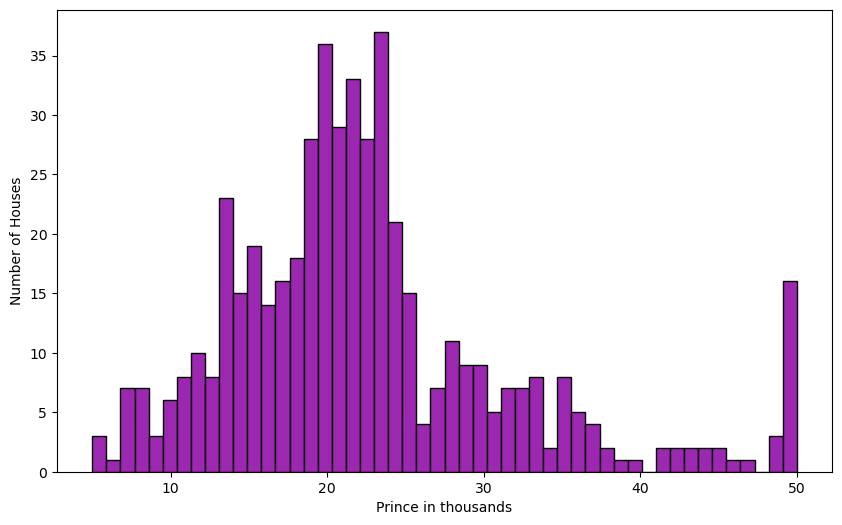

In [16]:
plt.figure(figsize=(10,6))
plt.hist(data['Price'], bins=50, ec='black',color='#9C27B0')
plt.xlabel('Prince in thousands')
plt.ylabel('Number of Houses')
plt.show()

C:\Users\Kiran Bharadwaj HD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


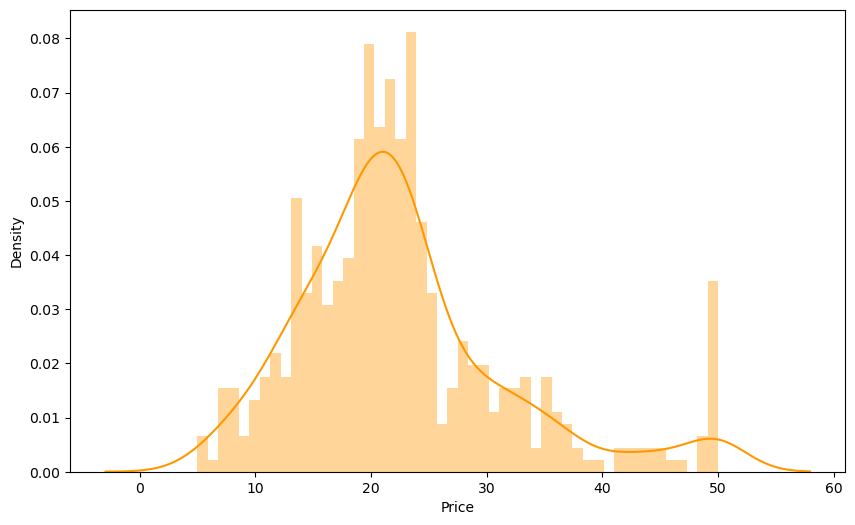

In [17]:
plt.figure(figsize=(10,6))
sns.distplot(data['Price'], bins=50, hist=True, kde=True, color="#FF9800")
plt.show()

C:\Users\Kiran Bharadwaj HD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


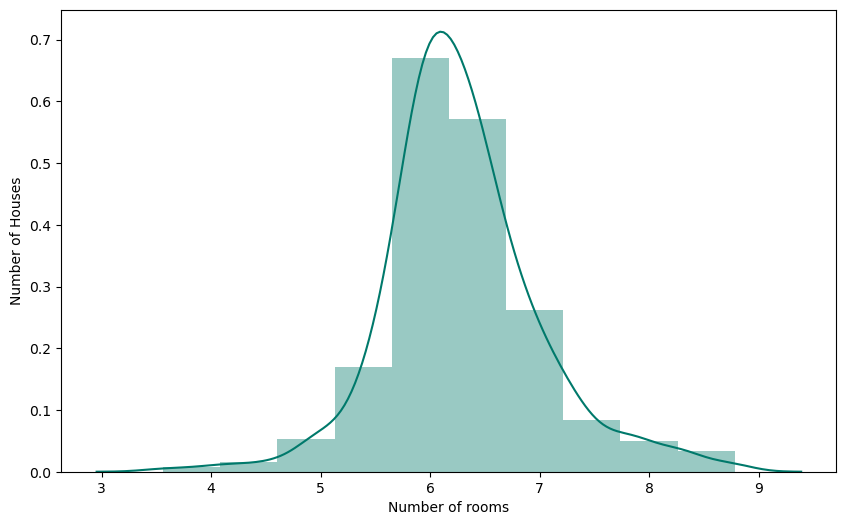

In [18]:
plt.figure(figsize=(10,6))
sns.distplot(data['RM'], bins=10, hist=True, kde=True, color="#00796b")
plt.xlabel('Number of rooms')
plt.ylabel('Number of Houses')
plt.show()

In [19]:
data['RM'].mean()

6.284634387351787

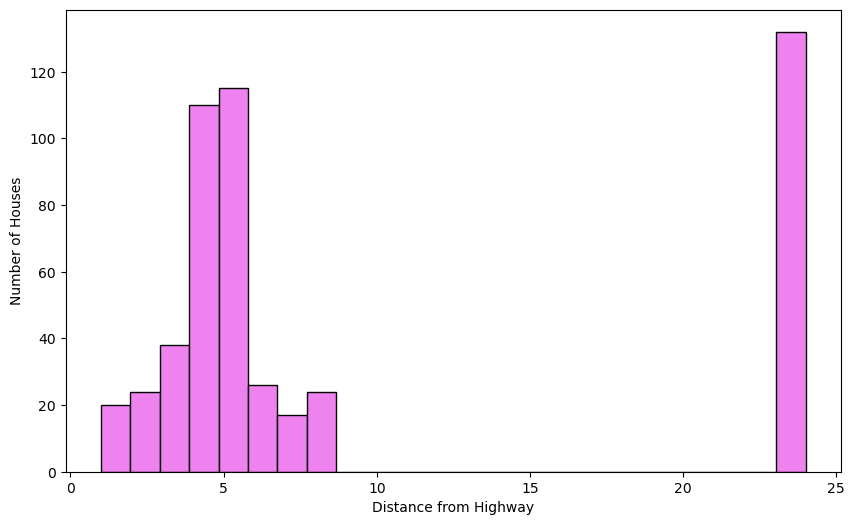

In [20]:
plt.figure(figsize=(10,6))
plt.hist(data['RAD'], bins=24, ec='black',  color="Violet")
plt.xlabel('Distance from Highway')
plt.ylabel('Number of Houses')
plt.show()

In [21]:
frequency=data['RAD'].value_counts()
type(frequency)

pandas.core.series.Series

In [22]:
frequency.index

Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 2.0, 8.0, 1.0, 7.0], dtype='float64')

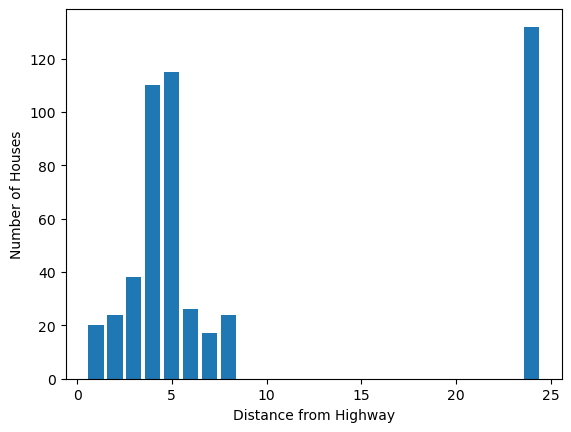

In [23]:
plt.bar(frequency.index, height=frequency)
plt.xlabel('Distance from Highway')
plt.ylabel('Number of Houses')
plt.show()

In [24]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

## Descriptive Statistics

In [25]:
data.describe() #data.median()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       Price  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## Correlation
## $$ \rho _{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [26]:
data['Price'].corr(data['RM'])

0.6953599470715393

In [27]:
data['Price'].corr(data['PTRATIO'])

-0.5077866855375616

In [28]:
data.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
Price   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     Price  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
Price    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [29]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices]=True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

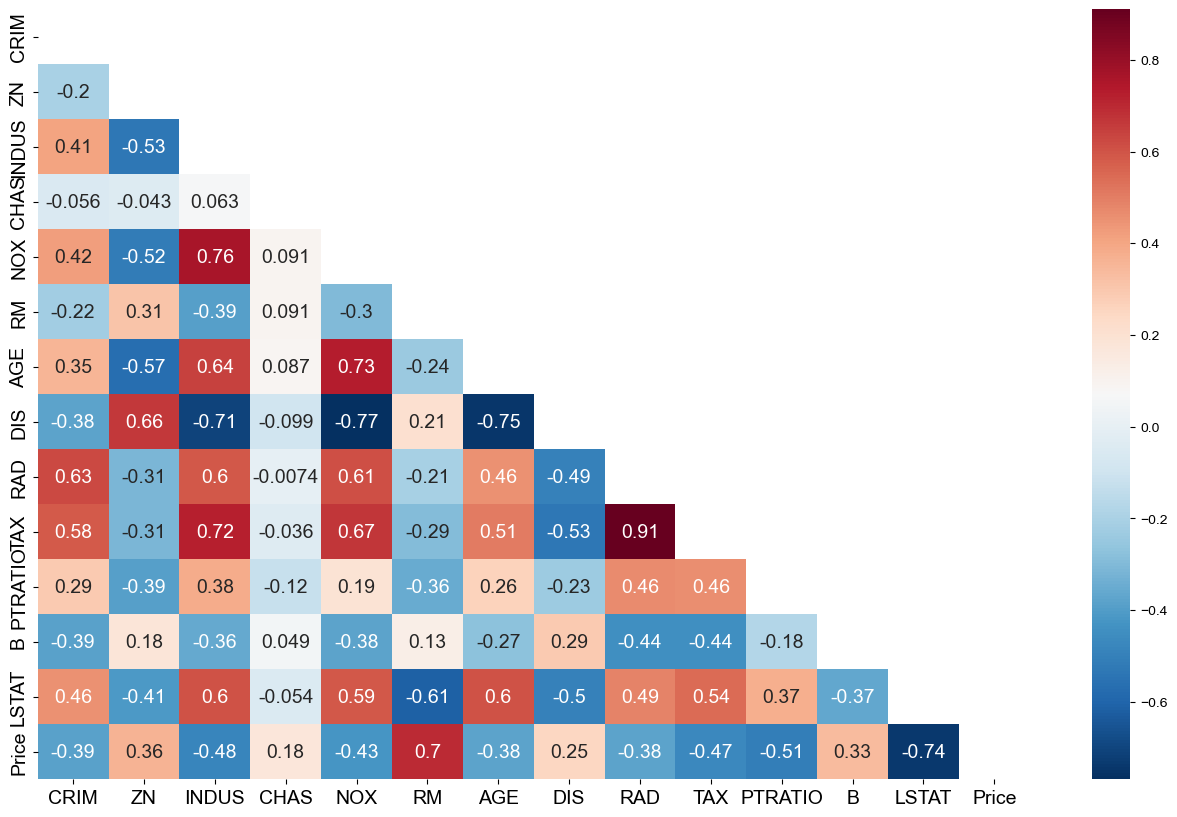

In [30]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),  cmap = "RdBu_r", mask=mask, annot=True, annot_kws={"size":14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
# Anscombe's Quartet
# Spurious-Correlation

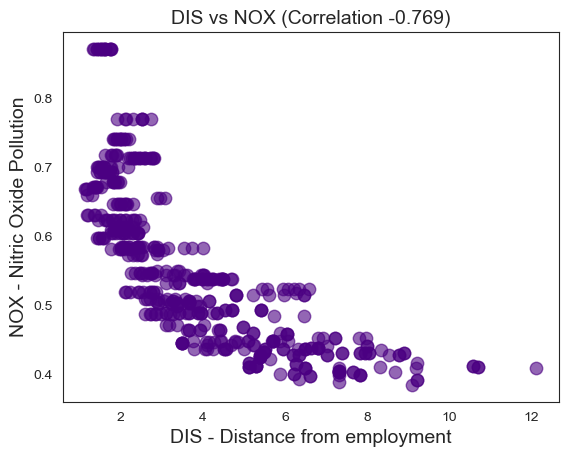

In [31]:
nos_dis_corr = round(data['NOX'].corr(data['DIS']),3)

plt.scatter(x=data['DIS'],y=data['NOX'], alpha=0.6, s=80, color='indigo')
plt.title(f'DIS vs NOX (Correlation {nos_dis_corr})', fontsize=14)
plt.xlabel('DIS - Distance from employment', fontsize=14)
plt.ylabel('NOX - Nitric Oxide Pollution', fontsize=14)
plt.show()

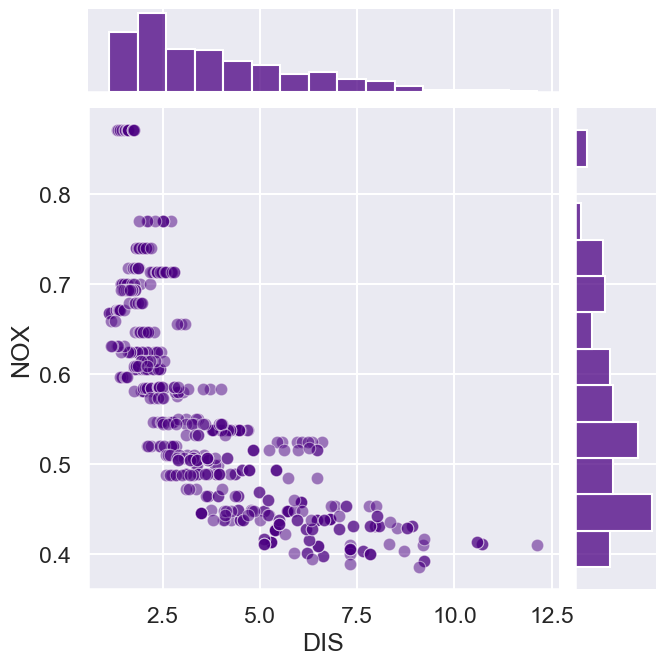

In [32]:
sns.set()
sns.set_style('darkgrid')
sns.set_context('talk')
sns.jointplot(x=data['DIS'],y=data['NOX'], height=7, color='indigo', joint_kws={'alpha':0.5})
plt.show()

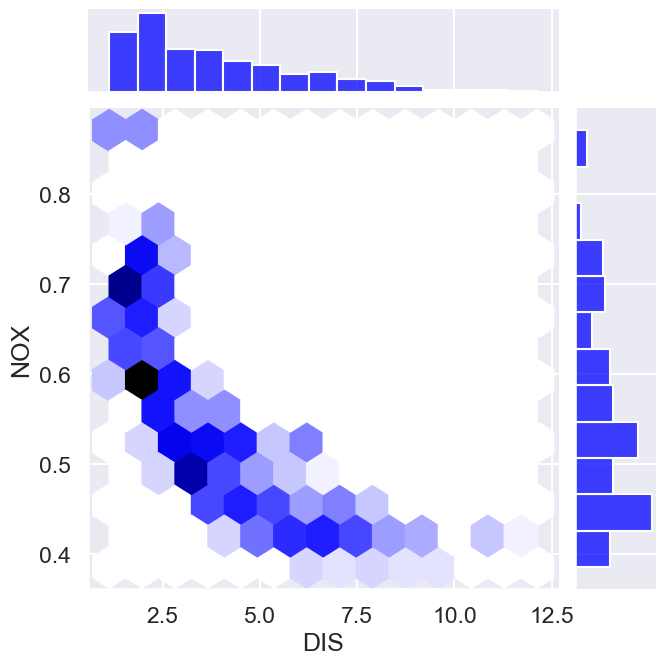

In [33]:
sns.set()
sns.set_style('darkgrid')
sns.set_context('talk')
sns.jointplot(x=data['DIS'],y=data['NOX'], height=7, color='blue', kind='hex')
plt.show()

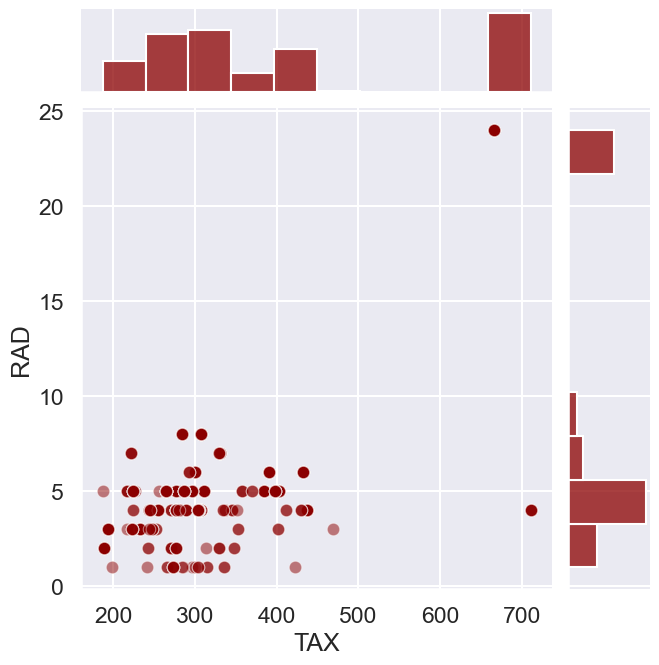

In [34]:
sns.set()
sns.set_style('darkgrid')
sns.set_context('talk')
sns.jointplot(x=data['TAX'],y=data['RAD'], height=7, color='darkred', joint_kws={'alpha':0.5})
plt.show()
#Non-Continious and outliers affects the corr

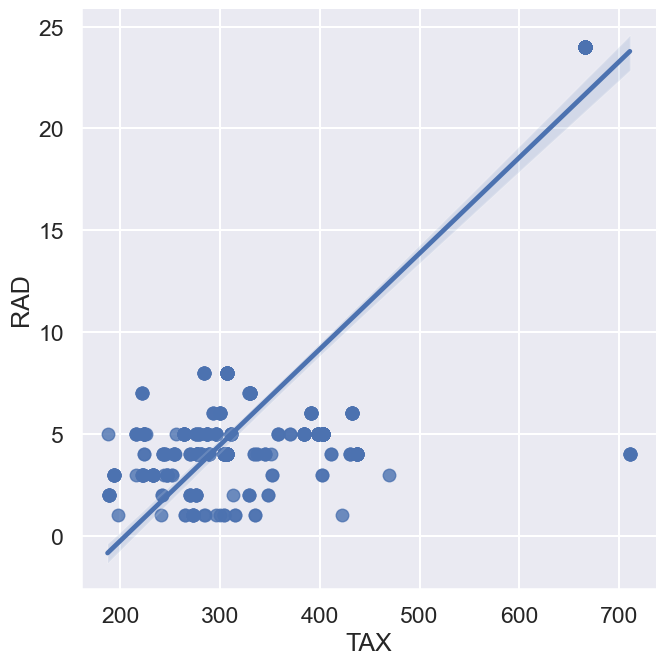

In [35]:
sns.lmplot(x='TAX', y='RAD', data=data, height=7)
plt.show()
#Out-liers are affecting the regression line

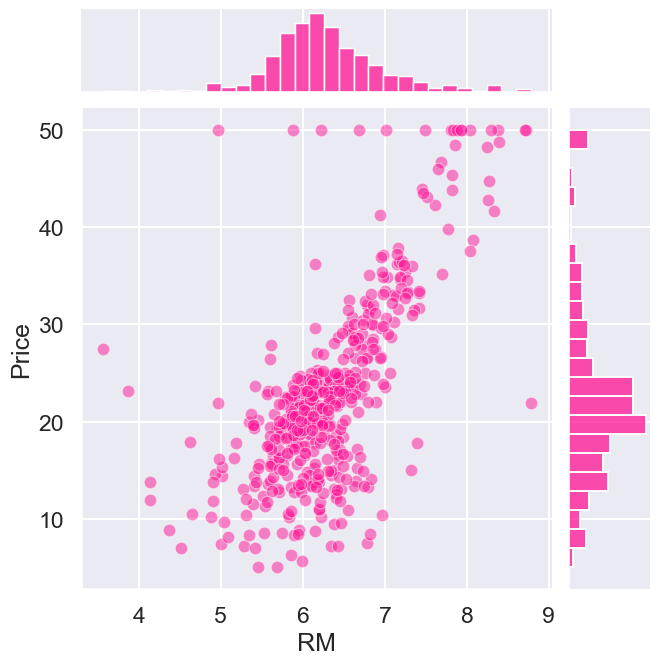

In [36]:
sns.set()
sns.set_style('darkgrid')
sns.set_context('talk')
sns.jointplot(x=data['RM'],y=data['Price'], height=7, color='#ff1495', joint_kws={'alpha':0.5})
plt.show()

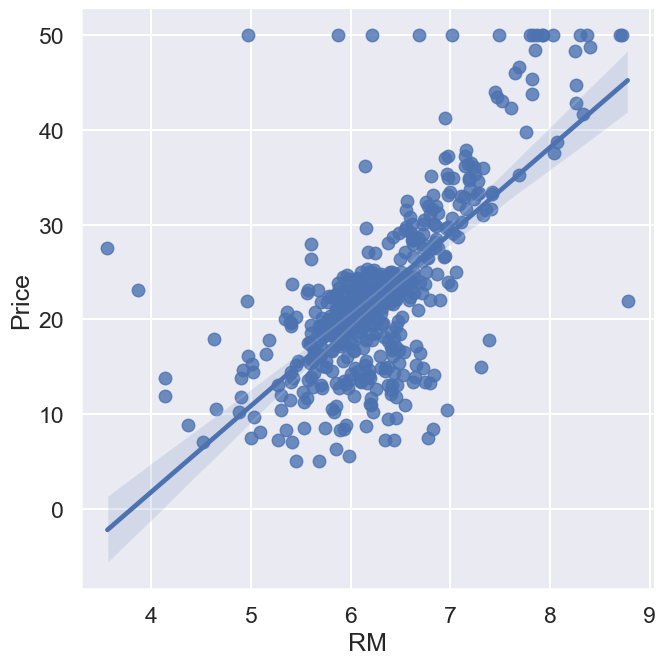

In [37]:
sns.lmplot(x='RM', y='Price', palette='pink', data=data, height=7)
plt.show()
#Out-liers are affecting the regression line

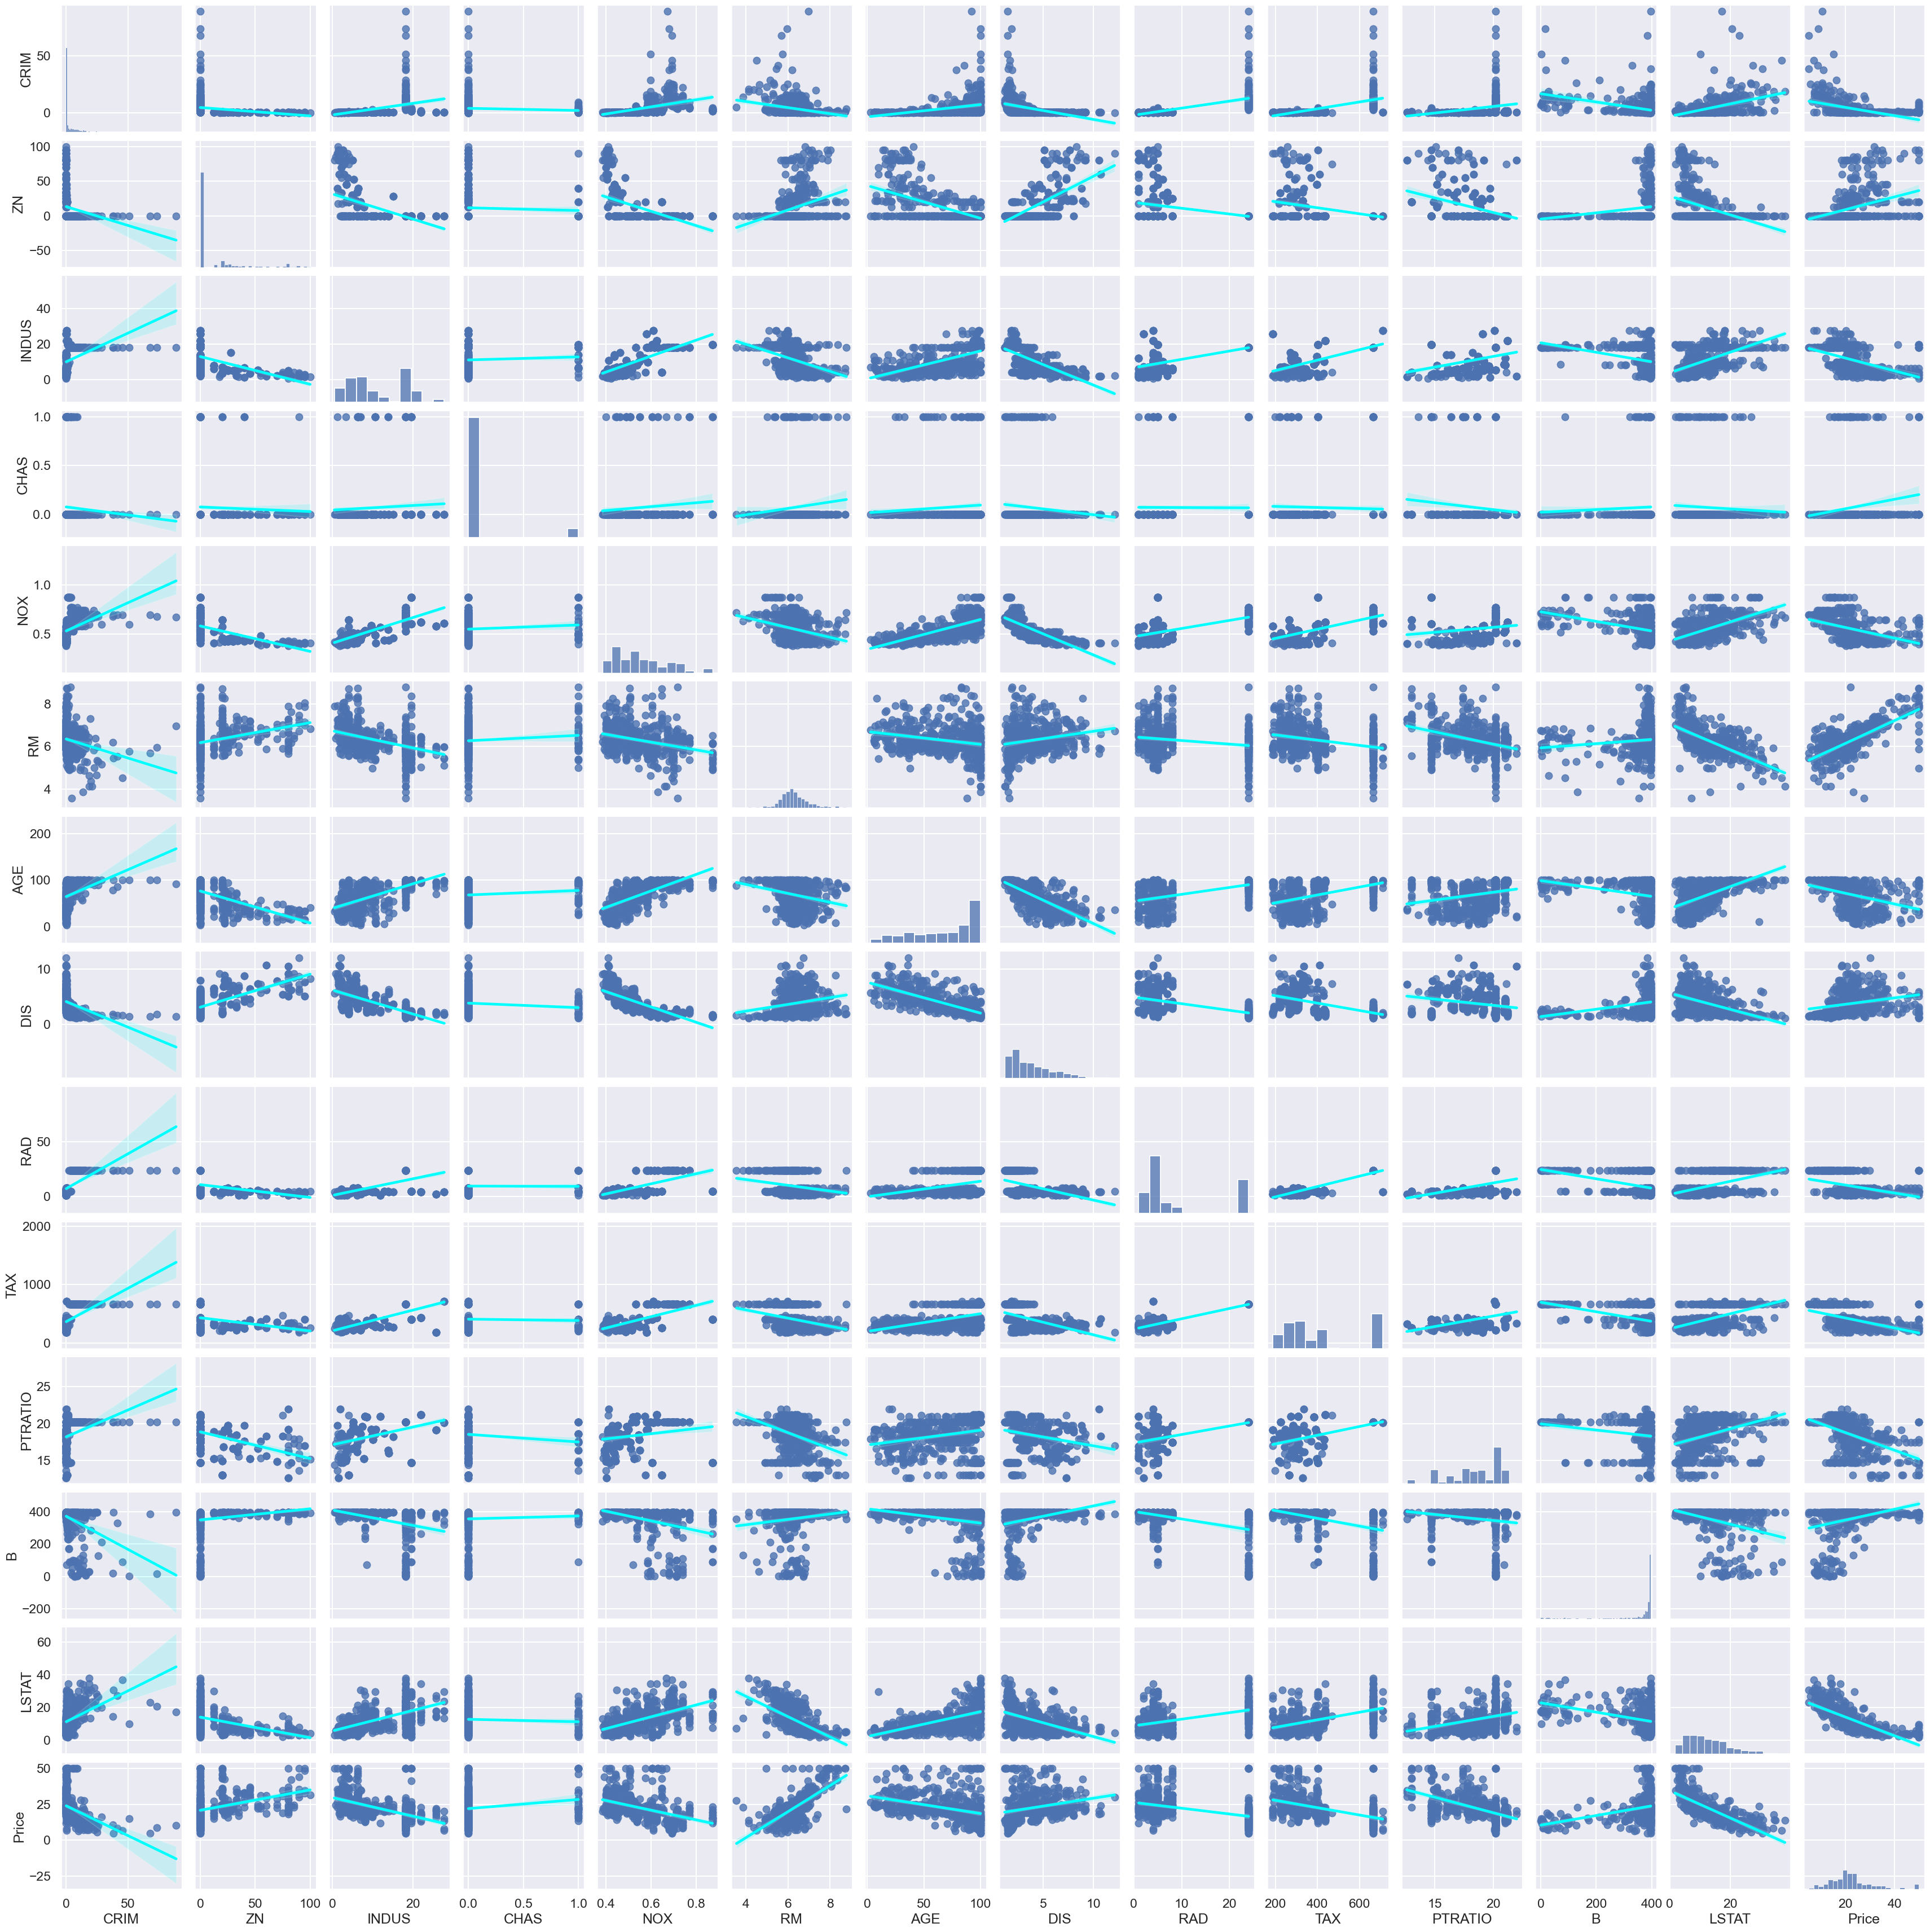

Wall time: 58 s


In [38]:
%%time
sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'cyan'}})
plt.show()

## Training and Test Dataset Split

In [39]:
prices=data['Price']
features=data.drop('Price', axis=1) #axis = 1 means column

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                      test_size=0.2, random_state=10)
#
print(len(X_train)/len(features))

0.7984189723320159


## Multivariable Regression

In [40]:
regr=LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept' , regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.750121534530608
Test data r-squared: 0.6709339839115638
Intercept 36.53305138282446


coef
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626

## Data Transformations

In [41]:
data['Price'].skew()

1.1080984082549072

In [42]:
y_log=np.log(data['Price'])
y_log.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: Price, dtype: float64

In [43]:
y_log.skew()

-0.33032129530987864

C:\Users\Kiran Bharadwaj HD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


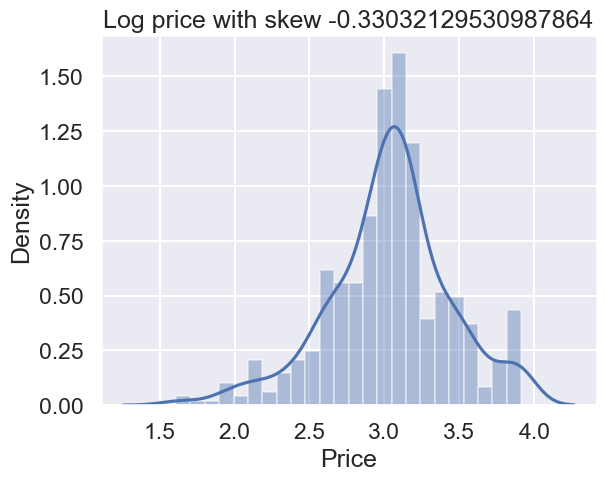

In [44]:
sns.distplot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')
plt.show()

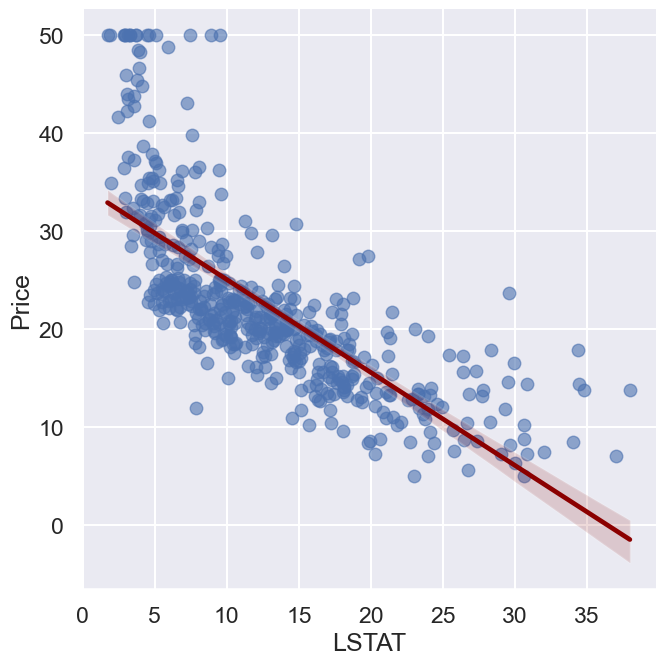

In [45]:
sns.lmplot(x='LSTAT', y='Price', data=data, height=7, scatter_kws={'alpha':0.6}, line_kws={'color':'darkred'})

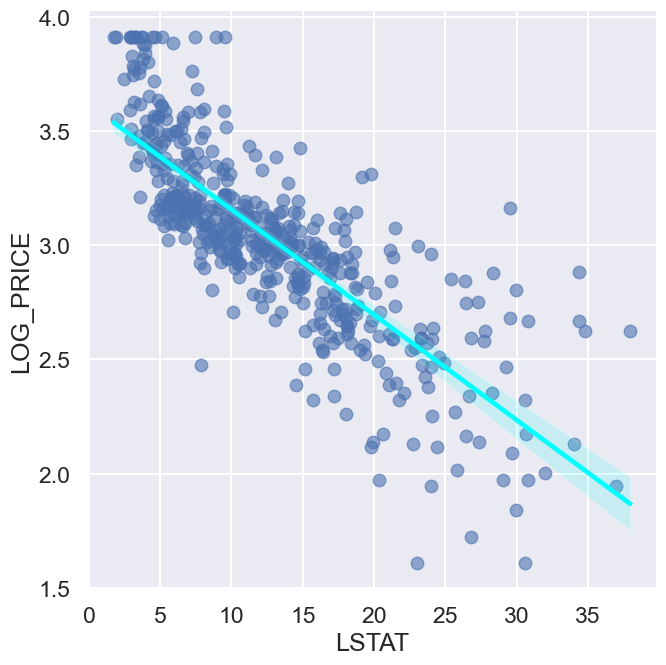

In [46]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log

sns.lmplot(x='LSTAT', y='LOG_PRICE', data=transformed_data, height=7, scatter_kws={'alpha':0.6}, line_kws={'color':'cyan'})

## Regression using log of prices

In [47]:
prices=np.log(data['Price']) #log price
features=data.drop('Price', axis=1) #axis = 1 means column

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                      test_size=0.2, random_state=10)
#
print(len(X_train)/len(features))

0.7984189723320159


In [48]:
regr=LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept' , regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.7930234826697584
Test data r-squared: 0.744692230626074
Intercept 4.059943871775202


coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

## p values and Evaluating Coeffcients

In [49]:
X_incl_const=sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results =model.fit()

results.params
results.pvalues

pd.DataFrame({'coef':results.params, 'p-value':round(results.pvalues,3)})
# INDUS and A GE are not startistically significant

coef  p-value
const    4.059944    0.000
CRIM    -0.010672    0.000
ZN       0.001579    0.009
INDUS    0.002030    0.445
CHAS     0.080331    0.038
NOX     -0.704068    0.000
RM       0.073404    0.000
AGE      0.000763    0.209
DIS     -0.047633    0.000
RAD      0.014565    0.000
TAX     -0.000645    0.000
PTRATIO -0.034795    0.000
B        0.000516    0.000
LSTAT   -0.031390    0.000

## Testing For Multicollinearity

$$ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + ... + \alpha _{12}LSTAT $$

$$ VIF _{TAX} = \frac{1}{(1 - R _{TAX} ^ 2)} $$


In [50]:
variance_inflation_factor(exog=X_incl_const.values,exog_idx=1)

1.7145250443932485

In [51]:
len(X_incl_const.columns)

14

In [52]:
#vif = []
#for i in range(len(X_incl_const.columns)):
#    vif.append(variance_inflation_factor(exog=X_incl_const.values,exog_idx=i))
#vif
vif=[variance_inflation_factor(exog=X_incl_const.values,exog_idx=i) 
     for i in range(len(X_incl_const.columns))]
pd.DataFrame({'coef_name':X_incl_const.columns,'vif':np.round(vif,2)})
## Threshold is 10!!!

coef_name     vif
0      const  597.55
1       CRIM    1.71
2         ZN    2.33
3      INDUS    3.94
4       CHAS    1.08
5        NOX    4.41
6         RM    1.84
7        AGE    3.33
8        DIS    4.22
9        RAD    7.31
10       TAX    8.51
11   PTRATIO    1.84
12         B    1.34
13     LSTAT    2.81

##  Model Simplification and the BIC

In [53]:
# original model with log prices and all features
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

original_coef = pd.DataFrame({'coef': results.params, 'p-value':round(results.pvalues,3)})

print('BIC is ',results.bic)
print('r-squared is',results.rsquared)

BIC is  -139.74997769478898
r-squared is 0.7930234826697584


In [54]:
# Reduced model with log prices and excluding INDUS
X_incl_const = sm.add_constant(X_train)
X_incl_const =X_incl_const.drop(['INDUS'],axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

original_coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-value':round(results.pvalues,3)})

print('BIC is ',results.bic)
print('r-squared is',results.rsquared)

# This is better

BIC is  -145.1450885559114
r-squared is 0.7927126289415162


In [55]:
# Reduced model with log prices and excluding AGE and INDUS
X_incl_const = sm.add_constant(X_train)
X_incl_const =X_incl_const.drop(['AGE'],axis=1)
X_incl_const =X_incl_const.drop(['INDUS'],axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

original_coef_minus_indus_and_age = pd.DataFrame({'coef': results.params, 'p-value':round(results.pvalues,3)})

print('BIC is ',results.bic)
print('r-squared is',results.rsquared)

# This is better

BIC is  -149.49934294224656
r-squared is 0.7918657661852815


In [56]:
frames=[original_coef, original_coef_minus_indus, original_coef_minus_indus_and_age]
pd.concat(frames, axis=1)

coef  p-value      coef  p-value      coef  p-value
const    4.059944    0.000  4.056231    0.000  4.035922    0.000
CRIM    -0.010672    0.000 -0.010721    0.000 -0.010702    0.000
ZN       0.001579    0.009  0.001551    0.010  0.001461    0.014
INDUS    0.002030    0.445       NaN      NaN       NaN      NaN
CHAS     0.080331    0.038  0.082795    0.032  0.086449    0.025
NOX     -0.704068    0.000 -0.673365    0.000 -0.616448    0.000
RM       0.073404    0.000  0.071739    0.000  0.076133    0.000
AGE      0.000763    0.209  0.000766    0.207       NaN      NaN
DIS     -0.047633    0.000 -0.049394    0.000 -0.052692    0.000
RAD      0.014565    0.000  0.014014    0.000  0.013743    0.000
TAX     -0.000645    0.000 -0.000596    0.000 -0.000590    0.000
PTRATIO -0.034795    0.000 -0.034126    0.000 -0.033481    0.000
B        0.000516    0.000  0.000511    0.000  0.000518    0.000
LSTAT   -0.031390    0.000 -0.031262    0.000 -0.030271    0.000

## Residuals and Residual Plots

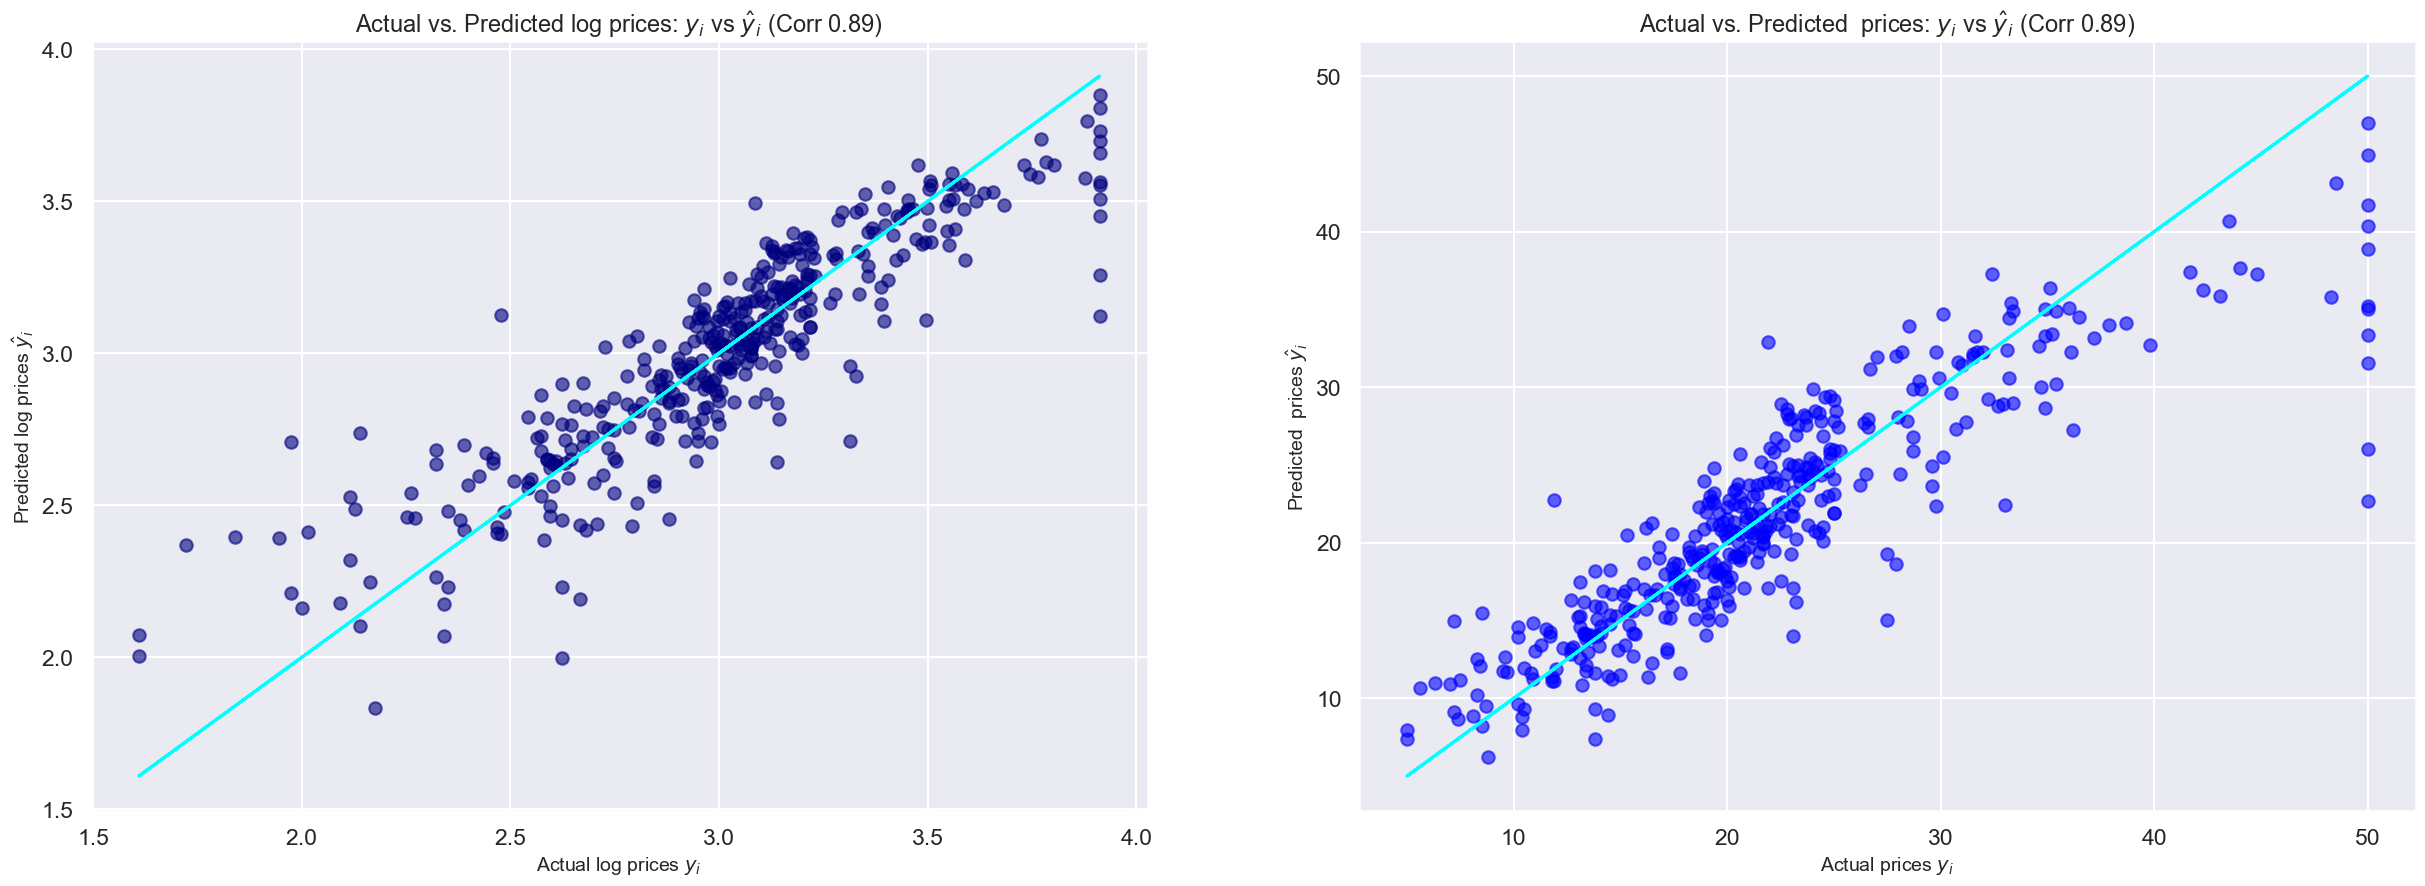

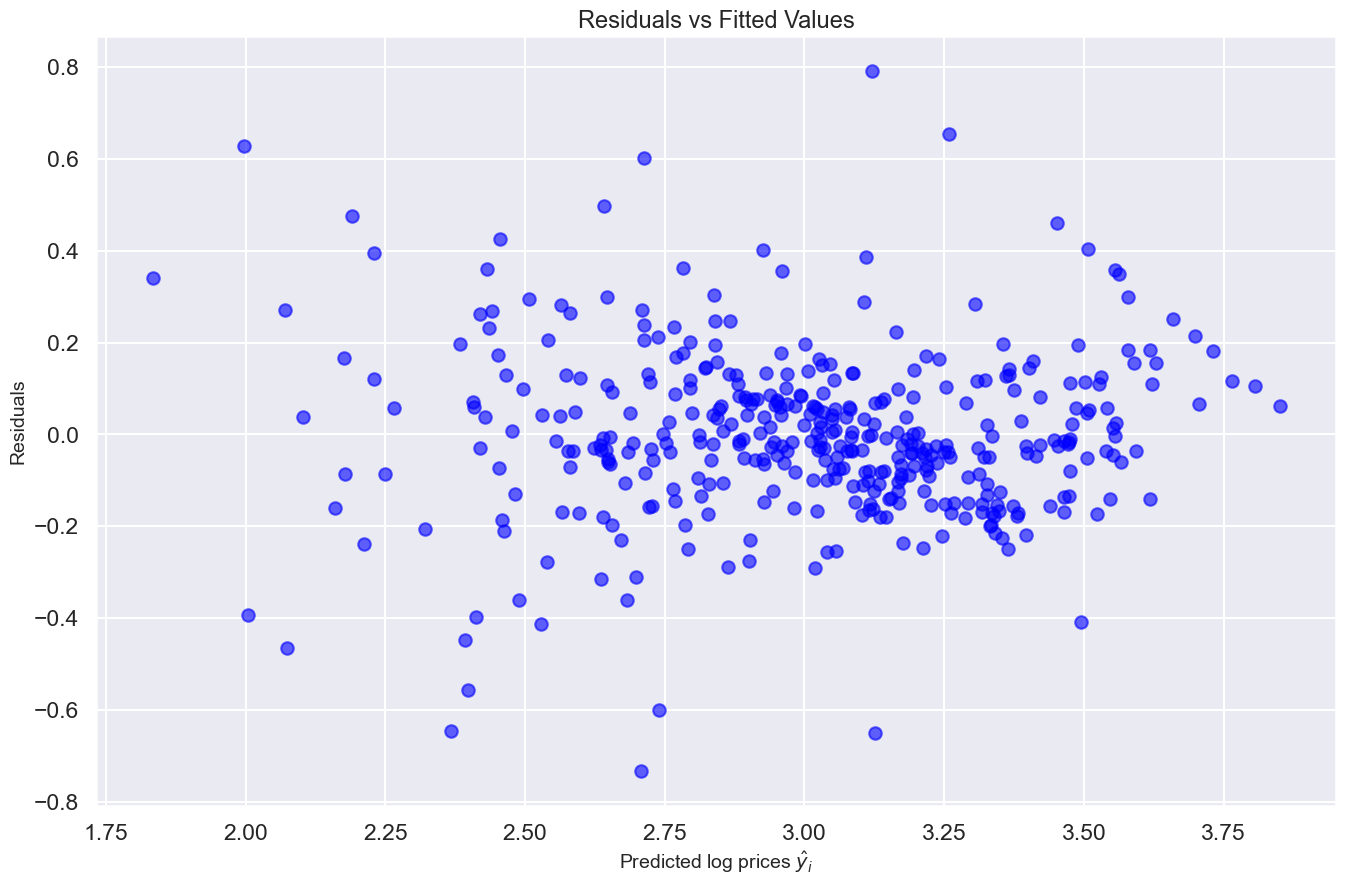

In [57]:
# Modified Model: transformed (using log prices) and dropping two features INDUS and AGE
prices=np.log(data['Price']) #log price
features=data.drop(['Price','INDUS','AGE'], axis=1) #axis = 1 means column

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                      test_size=0.2, random_state=10)
# Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Residuals
#residuals = y_train - results.fittedvalues
#residuals.describe()
#results.resid.describe()

#Graph of Actual vs. Predicted Prices
plt.figure(figsize=(30,10))
corr = round(y_train.corr(results.fittedvalues),2)
plt.subplot(1,2,1)

plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs. Predicted log prices: $y _i$ vs $\hat y _i$ (Corr {corr})', fontsize=17)



plt.subplot(1,2,2)
plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c='blue', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='cyan')
plt.xlabel('Actual prices $y _i$', fontsize=14)
plt.ylabel('Predicted  prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs. Predicted  prices: $y _i$ vs $\hat y _i$ (Corr {corr})', fontsize=17)
plt.show()

#Residuals vs Predicted values
plt.figure(figsize=(16,10))
plt.scatter(x=results.fittedvalues, y=results.resid, c='blue', alpha=0.6)
plt.xlabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)
plt.show()

# MSE and Rsquared
reduced_log_mse = round(results.mse_resid,3)
reduced_log_rsquared = round(results.rsquared,3)

C:\Users\Kiran Bharadwaj HD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


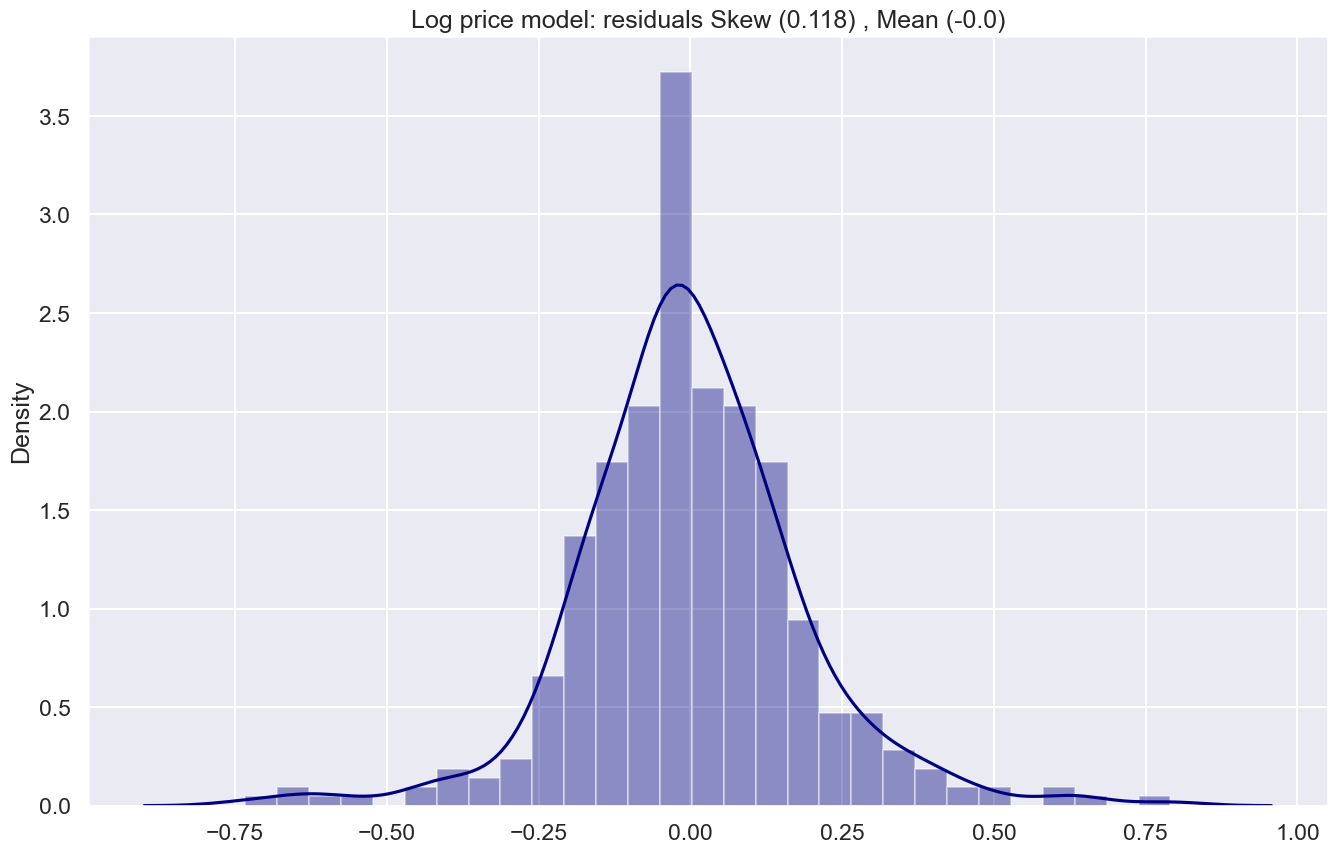

In [58]:
# Distribution of residuals (log prices) - checking for normality
resid_mean=round(results.resid.mean(),3)
resid_skew=round(results.resid.skew(),3)
plt.figure(figsize=(16,10))
plt.title(f'Log price model: residuals Skew ({resid_skew}) , Mean ({resid_mean})')
sns.distplot(results.resid, color='navy')
plt.show()

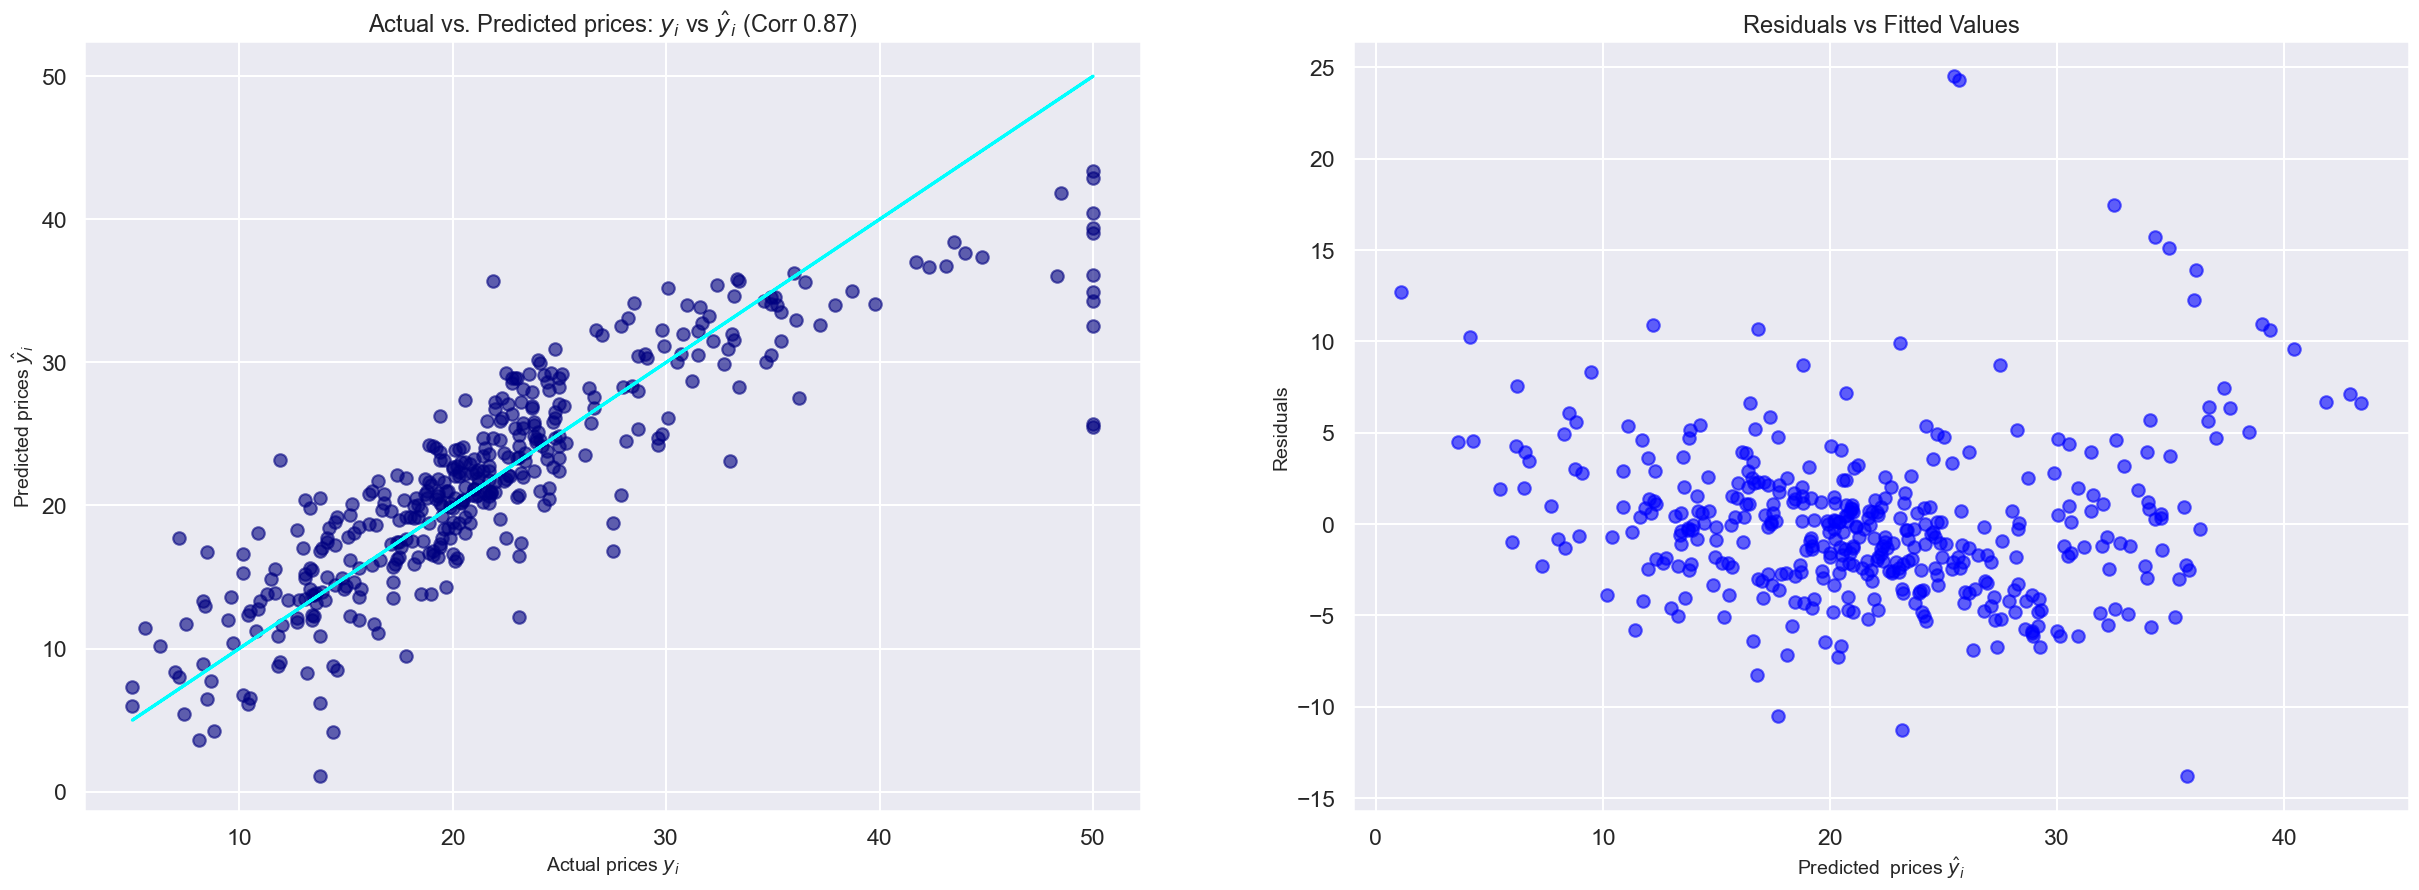

C:\Users\Kiran Bharadwaj HD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


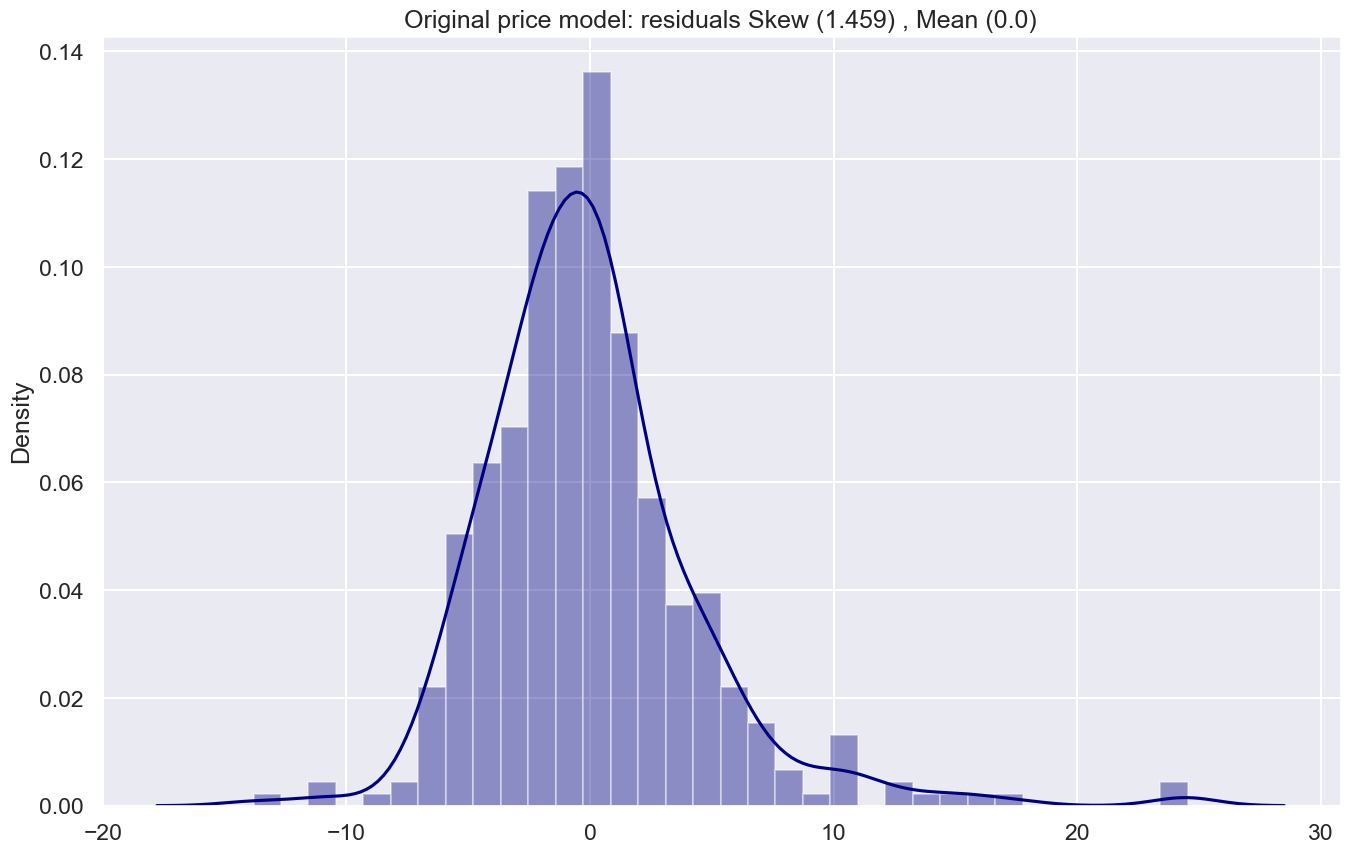

In [59]:
# Original Model
prices=(data['Price'])
features=data.drop(['Price'], axis=1) #axis = 1 means column

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                      test_size=0.2, random_state=10)
# Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Residuals
#residuals = y_train - results.fittedvalues
#residuals.describe()
#results.resid.describe()

#Graph of Actual vs. Predicted Prices
plt.figure(figsize=(30,10))
corr = round(y_train.corr(results.fittedvalues),2)
plt.subplot(1,2,1)

plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.xlabel('Actual prices $y _i$', fontsize=14)
plt.ylabel('Predicted prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs. Predicted prices: $y _i$ vs $\hat y _i$ (Corr {corr})', fontsize=17)



plt.subplot(1,2,2)


plt.scatter(x=results.fittedvalues, y=results.resid, c='blue', alpha=0.6)
plt.xlabel('Predicted  prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)
plt.show()

# Distribution of residuals (log prices) - checking for normality
resid_mean=round(results.resid.mean(),3)
resid_skew=round(results.resid.skew(),3)
plt.figure(figsize=(16,10))
plt.title(f'Original price model: residuals Skew ({resid_skew}) , Mean ({resid_mean})')
sns.distplot(results.resid, color='navy')
plt.show()

# MSE and Rsquared
full_normal_mse = round(results.mse_resid,3)
full_normal_rsquared = round(results.rsquared,3)

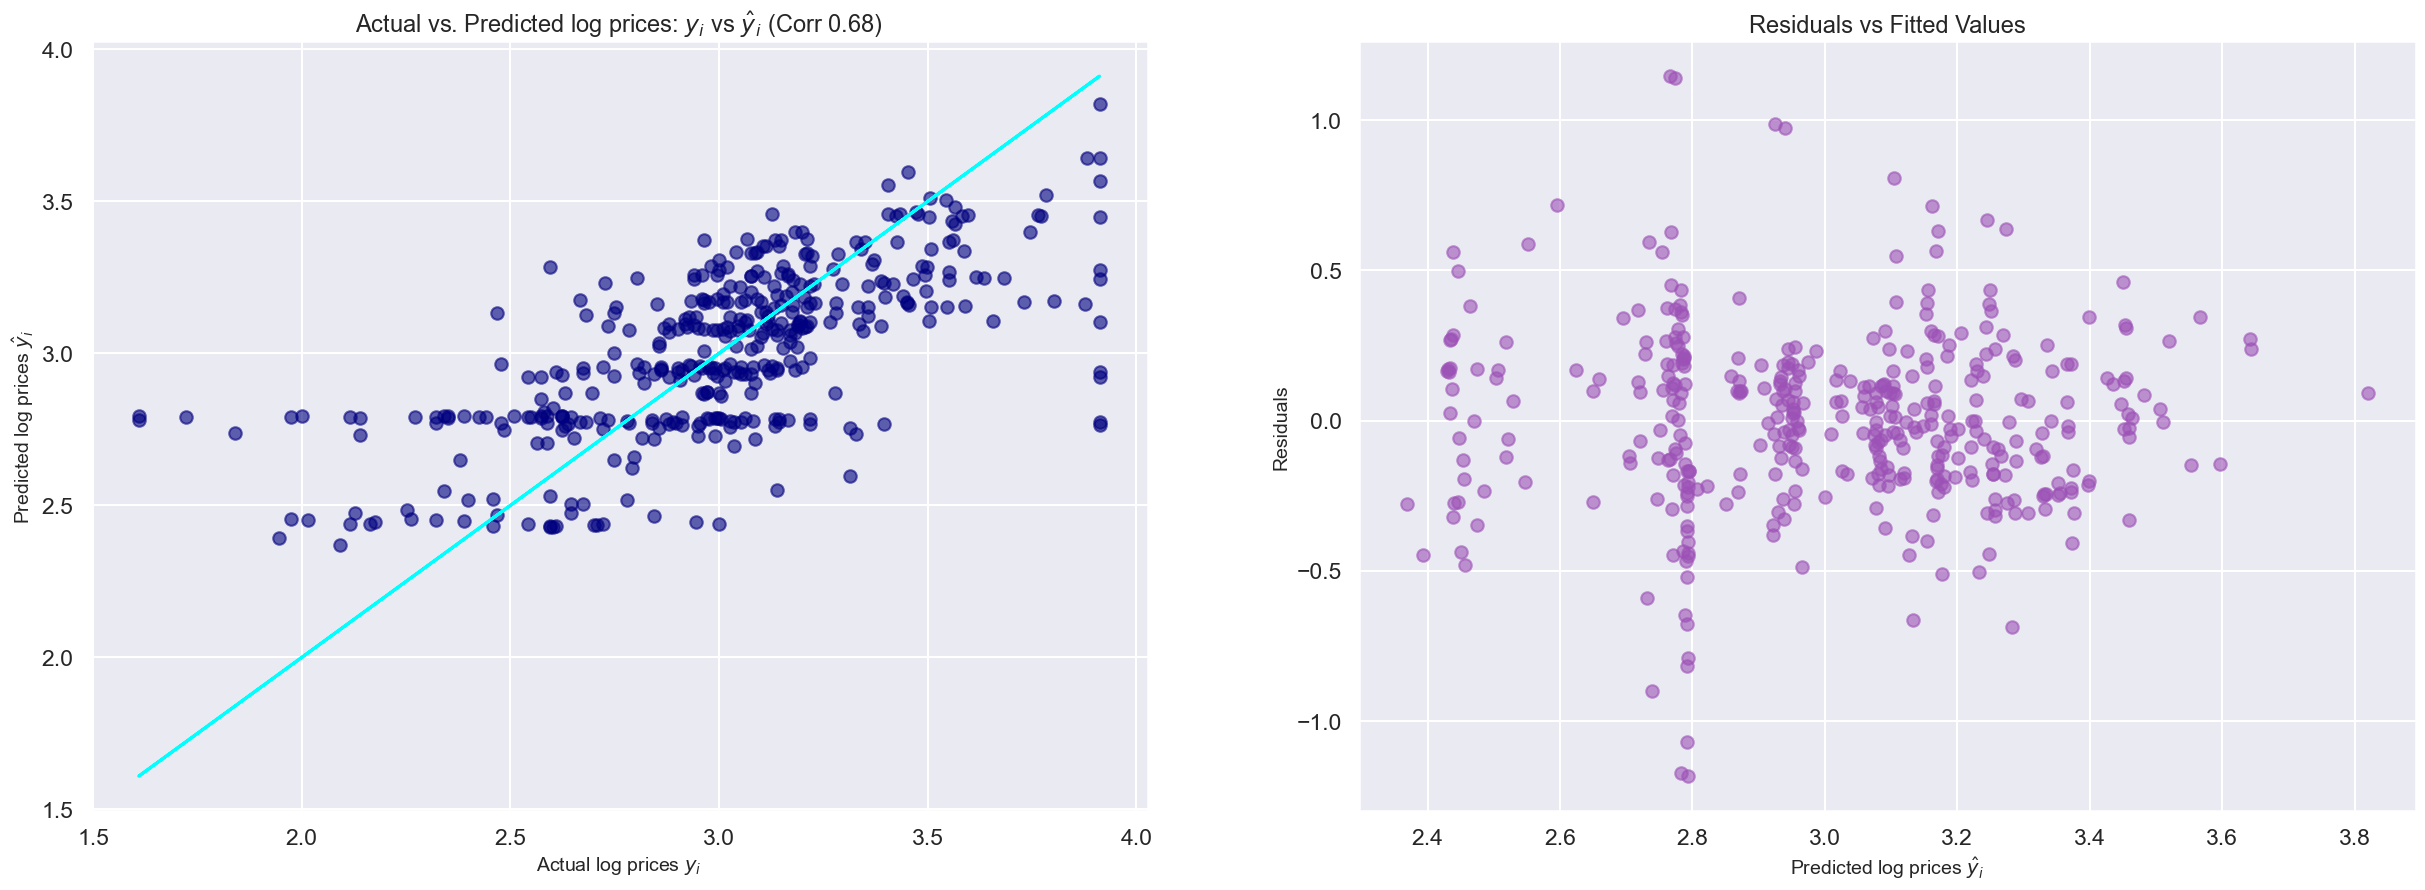

C:\Users\Kiran Bharadwaj HD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


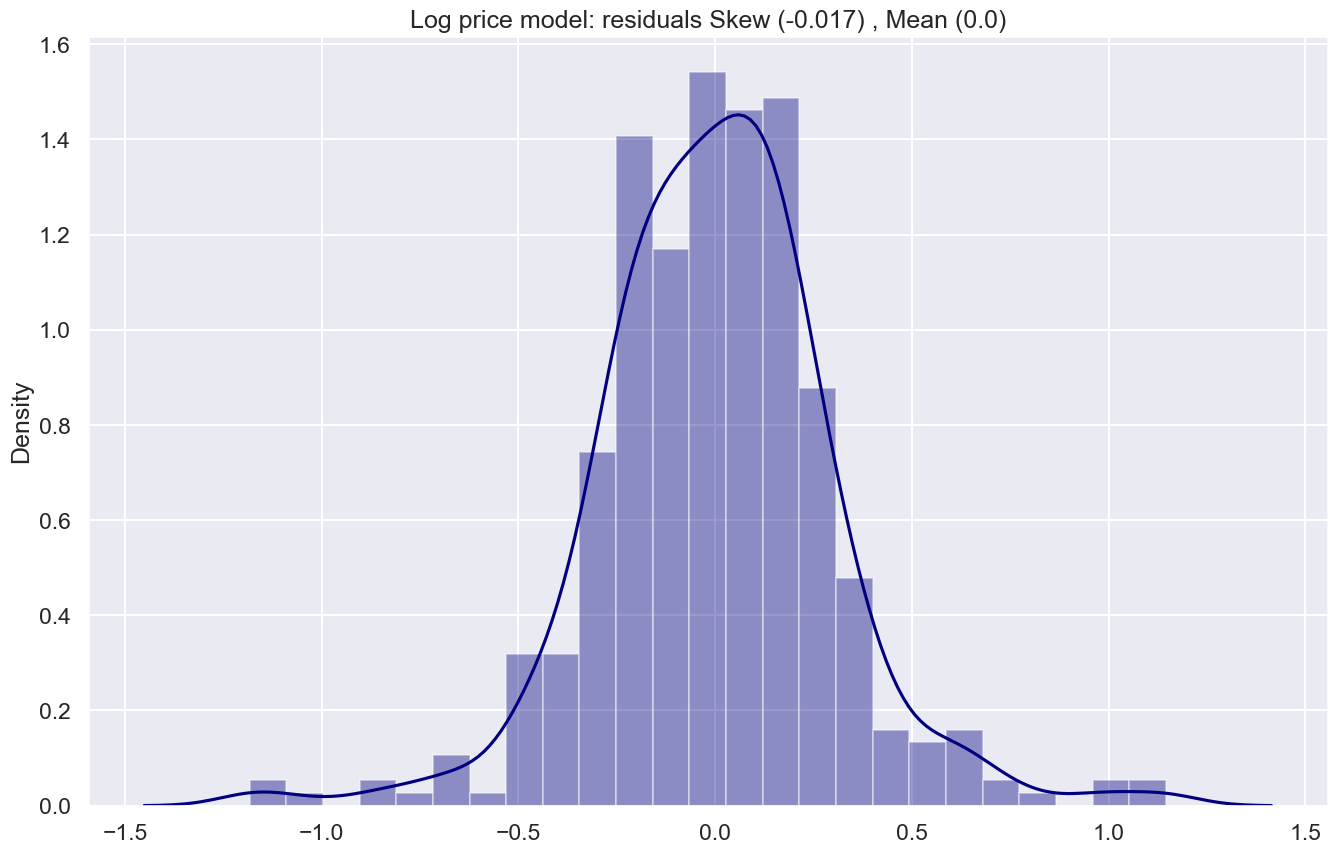

In [60]:
# Model Omitting Key features and using log prices
prices=np.log(data['Price'])
features=data.drop(['Price','INDUS','AGE','LSTAT','RM','NOX','CRIM'], axis=1) #axis = 1 means column

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                      test_size=0.2, random_state=10)
# Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Residuals
#residuals = y_train - results.fittedvalues
#residuals.describe()
#results.resid.describe()

#Graph of Actual vs. Predicted Prices
plt.figure(figsize=(30,10))
corr = round(y_train.corr(results.fittedvalues),2)
plt.subplot(1,2,1)

plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs. Predicted log prices: $y _i$ vs $\hat y _i$ (Corr {corr})', fontsize=17)



plt.subplot(1,2,2)


plt.scatter(x=results.fittedvalues, y=results.resid, c='#9c51b6', alpha=0.6)
plt.xlabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)
plt.show()

# Distribution of residuals (log prices) - checking for normality
resid_mean=round(results.resid.mean(),3)
resid_skew=round(results.resid.skew(),3)
plt.figure(figsize=(16,10))
plt.title(f'Log price model: residuals Skew ({resid_skew}) , Mean ({resid_mean})')
sns.distplot(results.resid, color='navy')
plt.show()

#The banding indicate missing of important features

# MSE and Rsquared
omitted_var_mse = round(results.mse_resid,3)
omitted_var_rsquared = round(results.rsquared,3)

In [61]:
pd.DataFrame({'R-Squared':[reduced_log_rsquared, full_normal_rsquared, omitted_var_rsquared], 
              'MSE':[reduced_log_mse, full_normal_mse, omitted_var_mse],
              'RMSE':np.sqrt([reduced_log_mse, full_normal_mse, omitted_var_mse])},
             index=['Reduced Log Model','Full Normal Price Model', 'Omitted Var Model']) 


R-Squared     MSE      RMSE
Reduced Log Model            0.792   0.035  0.187083
Full Normal Price Model      0.750  19.921  4.463295
Omitted Var Model            0.460   0.090  0.300000

In [62]:

print('1 s.d. in log prices is', np.sqrt(reduced_log_mse))
print('2 s.d. in log prices is', 2*np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print('The upper bound in log prices for a 95% prediction interval is ', upper_bound)
print('The upper bound in normal prices is $', np.e**upper_bound * 1000)

lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print('The lower bound in log prices for a 95% prediction interval is ', lower_bound)
print('The lower bound in normal prices is $', np.e**lower_bound * 1000)

1 s.d. in log prices is 0.18708286933869708
2 s.d. in log prices is 0.37416573867739417
The upper bound in log prices for a 95% prediction interval is  3.7753631203395495
The upper bound in normal prices is $ 43613.34233239937
The lower bound in log prices for a 95% prediction interval is  3.0270316429847615
The lower bound in normal prices is $ 20635.886906824155


In [63]:
val.get_dollar_estimate(8, 15, False)

The estimated property value is 755000.0.
At 95% confidence the valuation range is
USD 519000.0 at the lower end to USD 1099000.0 at the high end.


C:\Users\Kiran Bharadwaj HD\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
